In [1]:
## Visualization plot

## Look at Illegal parking complaints in 311 data. 

## Look at Subway map and see if there is any sort of relationship between the subway stop locations 
#  and # of complaints. 

## If time, look at demographic data as well. 

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import io
import pylab as plt
from fiona.crs import from_epsg
%matplotlib inline

In [3]:
#Read in 311 data
!curl https://data.cityofnewyork.us/api/views/3rfa-3xsf/rows.csv?accessType=DOWNLOAD > data_311.csv
    
!mv data_311.csv $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  356M    0  356M    0     0  4096k      0 --:--:--  0:01:29 --:--:-- 4448k^C--:-- 4273k


In [4]:
#Read in cafes file
!curl https://data.cityofnewyork.us/api/views/qcdj-rwhu/rows.csv?accessType=DOWNLOAD > cafes.csv
!mv cafes.csv $PUIDATA


#Read in NYC Shapefile
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip 
!unzip application%2Fzip
!mv ZIP* $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  693k    0  693k    0     0  1434k      0 --:--:-- --:--:-- --:--:-- 1435k
--2018-12-04 23:09:18--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2018-12-04 23:09:18--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspe

In [5]:
#Read in CSVs as pandas df
complaints = pd.read_csv("%s/data_311.csv"%os.getenv("PUIDATA"))


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
cafes = pd.read_csv("%s/cafes.csv"%os.getenv("PUIDATA"))
nyc_map = gpd.read_file("%s/ZIP_CODE_040114.shp"%os.getenv("PUIDATA"))

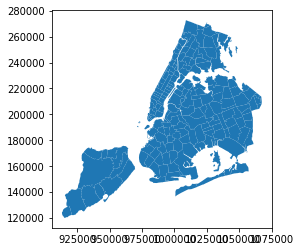

In [7]:
nyc_map.plot()

In [8]:
print(complaints['Complaint Type'].value_counts())

HEATING                              79005
Street Light Condition               60437
Street Condition                     54722
GENERAL CONSTRUCTION                 42019
PLUMBING                             37481
PAINT - PLASTER                      29363
Traffic Signal Condition             28593
Water System                         28344
Blocked Driveway                     23814
Sewer                                23487
NONCONST                             22235
Dirty Conditions                     19813
General Construction/Plumbing        19550
Noise                                15878
Sanitation Condition                 14221
Building/Use                         13737
ELECTRIC                             13189
Noise - Street/Sidewalk              12996
Noise - Commercial                   12074
Noise - Vehicle                      10026
Rodent                                9619
Taxi Complaint                        9574
Consumer Complaint                    9219
Missed Coll

In [9]:
#Only take illegal parking complaints
taxi_complaints = complaints.loc[complaints['Complaint Type'] == 'Taxi Complaint']

In [10]:
taxi_complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
168,12818582,01/01/2009 12:00:00 AM,02/01/2009 12:00:00 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.736562,-73.989016,"(40.73656152941463, -73.98901593621633)"
169,12818588,01/01/2009 12:00:00 AM,02/01/2009 12:00:00 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.783900,-73.974059,"(40.78390046991279, -73.97405860126572)"
203,12818631,01/01/2009 12:00:00 AM,02/24/2009 12:00:00 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11385,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705470,-73.909730,"(40.705469712614, -73.90973029695613)"
254,12818609,01/01/2009 12:00:00 AM,02/27/2009 12:00:00 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10468,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.862679,-73.909040,"(40.862679320986466, -73.90903969155586)"
255,12818620,01/01/2009 12:00:00 AM,02/01/2009 12:00:00 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11106,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.765224,-73.931692,"(40.76522441269007, -73.93169187852727)"


In [11]:
#Only take relevant columns: Complaint Type, Location
taxi_complaints = taxi_complaints[['Complaint Type', 'Location', 'Incident Zip']]
#taxi_complaints = taxi_complaints.loc[taxi_complaints['Incident Zip']]

#covert to gpd 
taxi_complaints_gpd = gpd.GeoDataFrame(taxi_complaints)

In [12]:
cafes = gpd.GeoDataFrame(cafes)
cafes = cafes[['LIC_STATUS', 'ZIP']]
cafes.head()

,LIC_STATUS,ZIP
0,Active,10011.0
1,Inactive,10013.0
2,Active,11222.0
3,Inactive,10023.0
4,Inactive,10011.0


In [13]:
#convert zips to int and then only take manhattan zipcodes for both dataframes
#Zip codes taken from: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
taxi_complaints_gpd = taxi_complaints_gpd.dropna()

taxi_complaints_gpd['Incident Zip'] = taxi_complaints_gpd['Incident Zip'].astype(int)
nyc_map['ZIPCODE'] = nyc_map['ZIPCODE'].astype(int)

taxi_complaints_gpd = taxi_complaints_gpd.loc[(taxi_complaints_gpd['Incident Zip'] < 10280) 
                                              & (taxi_complaints_gpd['Incident Zip'] > 10000)]
nyc_map = nyc_map.loc[nyc_map['ZIPCODE'] < 10280]
cafes = cafes.loc[cafes['ZIP'] < 10280]

In [14]:
taxi_complaints_gpd = taxi_complaints_gpd[['Complaint Type', 'Incident Zip']]

In [15]:
taxi_complaints_gpd.head()

,Complaint Type,Incident Zip
168,Taxi Complaint,10003
169,Taxi Complaint,10024
287,Taxi Complaint,10011
294,Taxi Complaint,10023
295,Taxi Complaint,10001


In [16]:
complaints_grouped = taxi_complaints_gpd.groupby('Incident Zip').count().reset_index()
complaints_grouped.head()

,Incident Zip,Complaint Type
0,10001,383
1,10002,164
2,10003,288
3,10004,45
4,10005,37


In [17]:
#Do the same for cafes
cafes = cafes[['LIC_STATUS', 'ZIP']]
cafes_grouped = cafes.groupby('ZIP').count().reset_index()
cafes_grouped.head()

,ZIP,LIC_STATUS
0,10001.0,10
1,10002.0,17
2,10003.0,80
3,10004.0,4
4,10006.0,3


In [18]:
nyc_map_final = nyc_map.merge(complaints_grouped, how = 'left', left_on = 'ZIPCODE', right_on = 'Incident Zip')
nyc_map_final = nyc_map_final.merge(cafes_grouped, how = 'left', left_on = 'ZIPCODE', right_on = 'ZIP')
nyc_map_final = nyc_map_final.drop(['Incident Zip', 'ZIP'], axis = 1)
nyc_map_final['complaints_per_cafe'] = np.log(nyc_map_final['Complaint Type'] / nyc_map_final['LIC_STATUS'])
nyc_map_final.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Complaint Type,LIC_STATUS,complaints_per_cafe
0,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169008225 257345.6566181332,...",18.0,17.0,0.057158
1,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1003020.86467731 256049.1618358046, ...",21.0,6.0,1.252763
2,10040,0,New York,41033.0,1.634074e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1002564.135275811 253724.7731118798,...",14.0,9.0,0.441833
3,10032,0,New York,57606.0,2.315957e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((998935.8528342247 249154.259943217, ...",32.0,7.0,1.519826
4,10031,0,New York,57010.0,1.690215e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1000830.038678393 241801.5896092206,...",35.0,13.0,0.990399


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


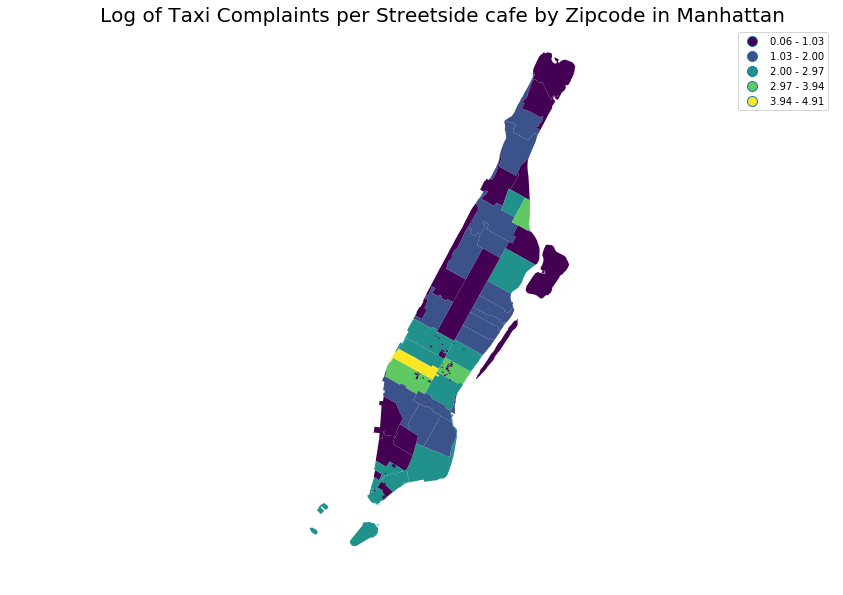

In [19]:
fig, ax = plt.subplots(1, figsize=(14, 10))
ax = nyc_map_final.plot(column = 'complaints_per_cafe', ax = ax, cmap = 'viridis',
                        scheme="Equal_interval",legend = True)
plt.title("Log of Taxi Complaints per Streetside cafe by Zipcode in Manhattan", fontsize = 20)
ax.set_axis_off()
plt.axis('equal')
plt.show()

# Figure 1

The above figure shows the logarithmic value of the number of taxi complaints per streetside cafe in Manhattan. As is expected based off of the number of overall taxi rides in Manhattan, we see a high number of complaints from Midtown to Lower Manhattan. 

The number of complaints per sidewalk cafe may be indicative of how close to the cafe the taxi chose to drop off their customers, with larger distances possibly leading to more complaints. Another reason, which would take more analysis, is how many "streetside cafes" actually exist per zipcode. 

In [22]:
#make a new column that standardizes per cafe rather than log
nyc_map_final['std_complaints'] = (nyc_map_final['Complaint Type'] - nyc_map_final['Complaint Type'].mean()) / nyc_map_final['Complaint Type'].std()




/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


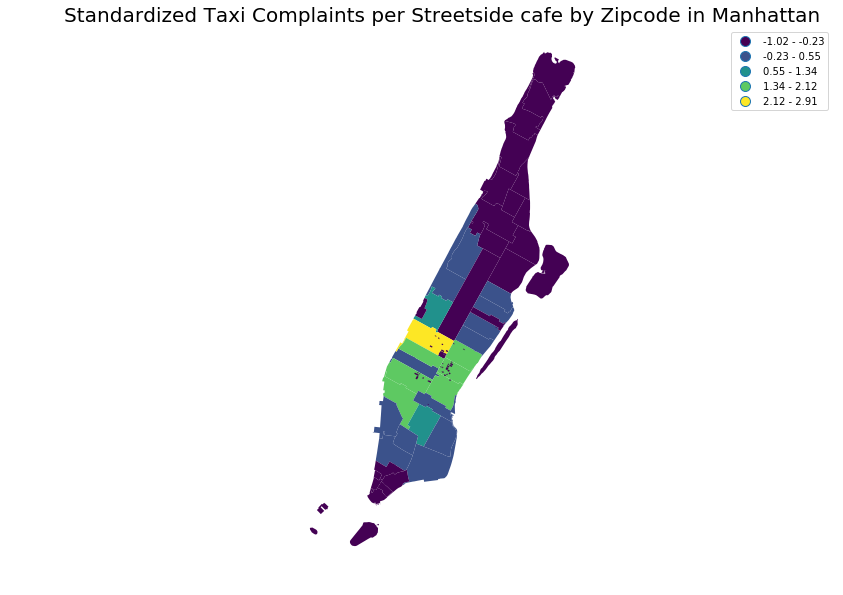

In [55]:
fig, ax = plt.subplots(1, figsize=(14, 10))
ax = nyc_map_final.plot(column = 'std_complaints', ax = ax, cmap = 'viridis',
                        scheme="Equal_interval", legend = True)
plt.title("Standardized Taxi Complaints per Streetside cafe by Zipcode in Manhattan", fontsize = 20)
ax.set_axis_off()
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.show()

# Figure 2

This plot shows the standardized Taxi complaints by zipcode in Manhattan. Interestingly, by standardizing the data, the high number of taxi complaints moves up to Midtown rather than Chelsea. 

The number of complaints per sidewalk cafe may be indicative of how close to the cafe the taxi chose to drop off their customers, with larger distances possibly leading to more complaints. Another reason, which would take more analysis, is how many "streetside cafes" actually exist per zipcode.